In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

Importing the production data


In [2]:
df = pd.read_csv('Data_From_China_Oilfield.csv')

Exploratory data analysis


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    24 non-null     int64  
 1   y       24 non-null     int64  
 2   x1      24 non-null     int64  
 3   x2      24 non-null     int64  
 4   x3      24 non-null     int64  
 5   x4      24 non-null     int64  
 6   x5      24 non-null     float64
 7   x6      24 non-null     float64
 8   x7      24 non-null     float64
 9   x8      24 non-null     int64  
dtypes: float64(3), int64(7)
memory usage: 2.0 KB


It can be observed that there are no null values and all the features are in numeric form

In [4]:
df.describe() #Checking statistical info of the dataframe

year             y            x1            x2           x3  \
count    24.000000  2.400000e+01     24.000000     24.000000    24.000000   
mean   1994.500000  3.949742e+06   4474.916667   3487.958333   859.916667   
std       7.071068  2.513695e+06   3371.137983   2883.126224   487.336141   
min    1983.000000  1.417200e+06    689.000000    612.000000   311.000000   
25%    1988.750000  1.629025e+06   1845.250000   1497.250000   482.750000   
50%    1994.500000  3.609450e+06   3795.000000   2852.000000   731.500000   
75%    2000.250000  4.835625e+06   5556.250000   3548.750000  1043.250000   
max    2006.000000  9.623000e+06  12314.000000  11092.000000  2347.000000   

                 x4         x5         x6         x7            x8  
count  2.400000e+01  24.000000  24.000000  24.000000  2.400000e+01  
mean   1.254121e+07  60.349167   1.160417  13.166667  3.608029e+06  
std    8.680148e+06  11.444300   0.258633   3.201741  2.252834e+06  
min    2.305000e+06  41.800000   0.830000   9.070000  1.417200e+06  
25%    5.089575e+06  48.925000   0.905000   9.982500  1.541750e+06  
50%    1.147070e+07  63.255000   1.145000  13.265000  3.259200e+06  
75%    1.709108e+07  71.880000   1.385000  15.980000  4.665400e+06  
max    3.298700e+07  72.950000   1.600000  17.740000  9.051000e+06

It can be observed that the features are in multiple ranges. so, the data frame is scaled later

In [5]:
df.isna().sum() #looking for null values

year    0
y       0
x1      0
x2      0
x3      0
x4      0
x5      0
x6      0
x7      0
x8      0
dtype: int64

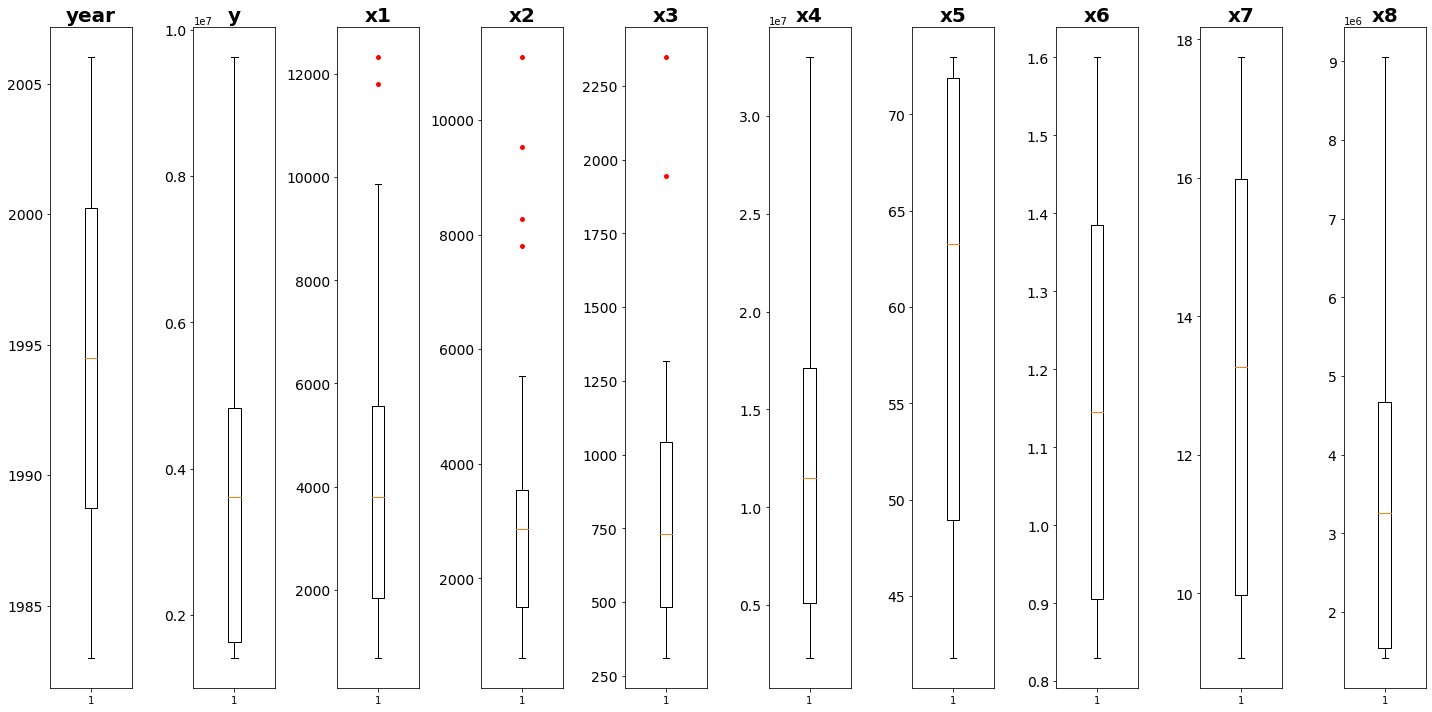

In [6]:
#Creating subplot of each column with its own scale to look for outliers
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fig, axs = plt.subplots(1, len(df.columns), figsize=(20,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df.iloc[:,i], flierprops=red_circle)
    ax.set_title(df.columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
    
plt.tight_layout()

Outliers can be seen in X1 , X2 and X3. I decided to keep them as they are not data entry mistakes. X1 is having a increasing trend and  X2 is alway less than X1 making them reliable data points. 



Drawing plot to look at the trend of variables over years

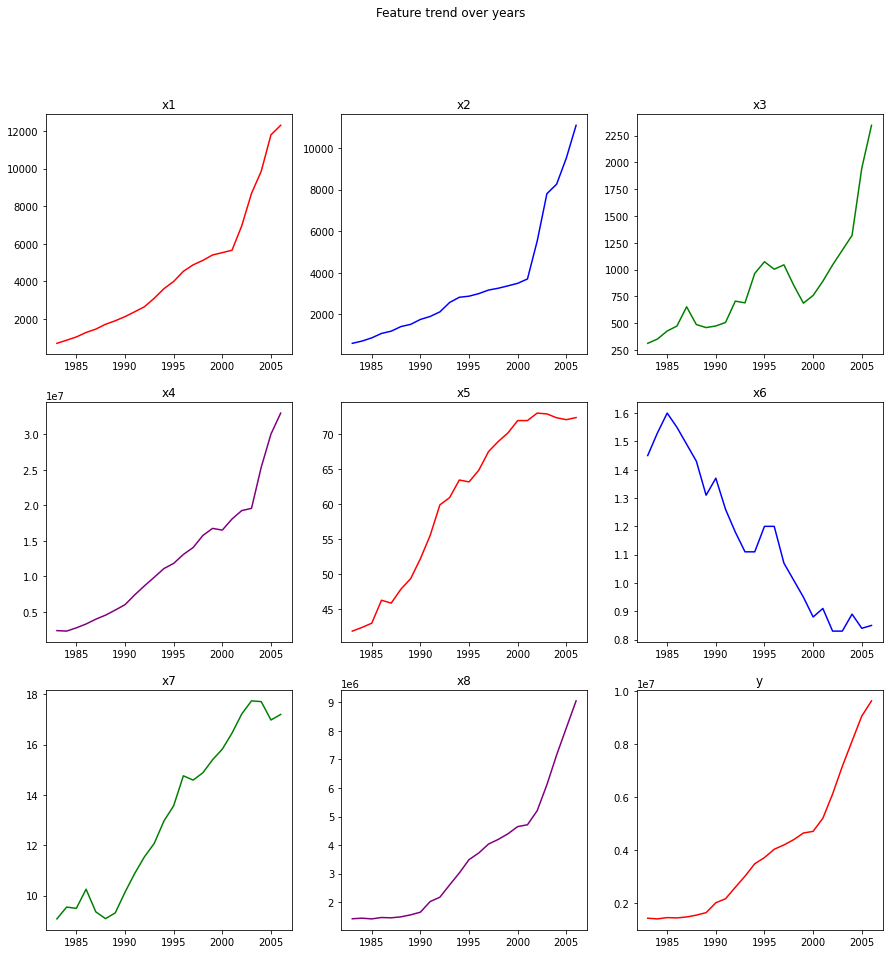

In [7]:
#define subplots
fig, ax = plt.subplots(3, 3, figsize=(15,15))

#create subplots
ax[0, 0].plot(df['year'], df['x1'], color='red')
ax[0, 0].set_title('x1')

ax[0, 1].plot(df['year'], df['x2'], color='blue')
ax[0, 1].set_title('x2')

ax[0, 2].plot(df['year'], df['x3'], color='green')
ax[0, 2].set_title('x3')

ax[1, 0].plot(df['year'], df['x4'], color='purple')
ax[1, 0].set_title('x4')

ax[1, 1].plot(df['year'], df['x5'], color='red')
ax[1, 1].set_title('x5')

ax[1, 2].plot(df['year'], df['x6'], color='blue')
ax[1, 2].set_title('x6')

ax[2, 0].plot(df['year'], df['x7'], color='green')
ax[2, 0].set_title('x7')

ax[2, 1].plot(df['year'], df['x8'], color='purple')
ax[2, 1].set_title('x8')

ax[2, 2].plot(df['year'], df['y'], color='red')
ax[2, 2].set_title('y')

plt.suptitle('Feature trend over years')
plt.show()

C:\Users\Sravani\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sravani\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sravani\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

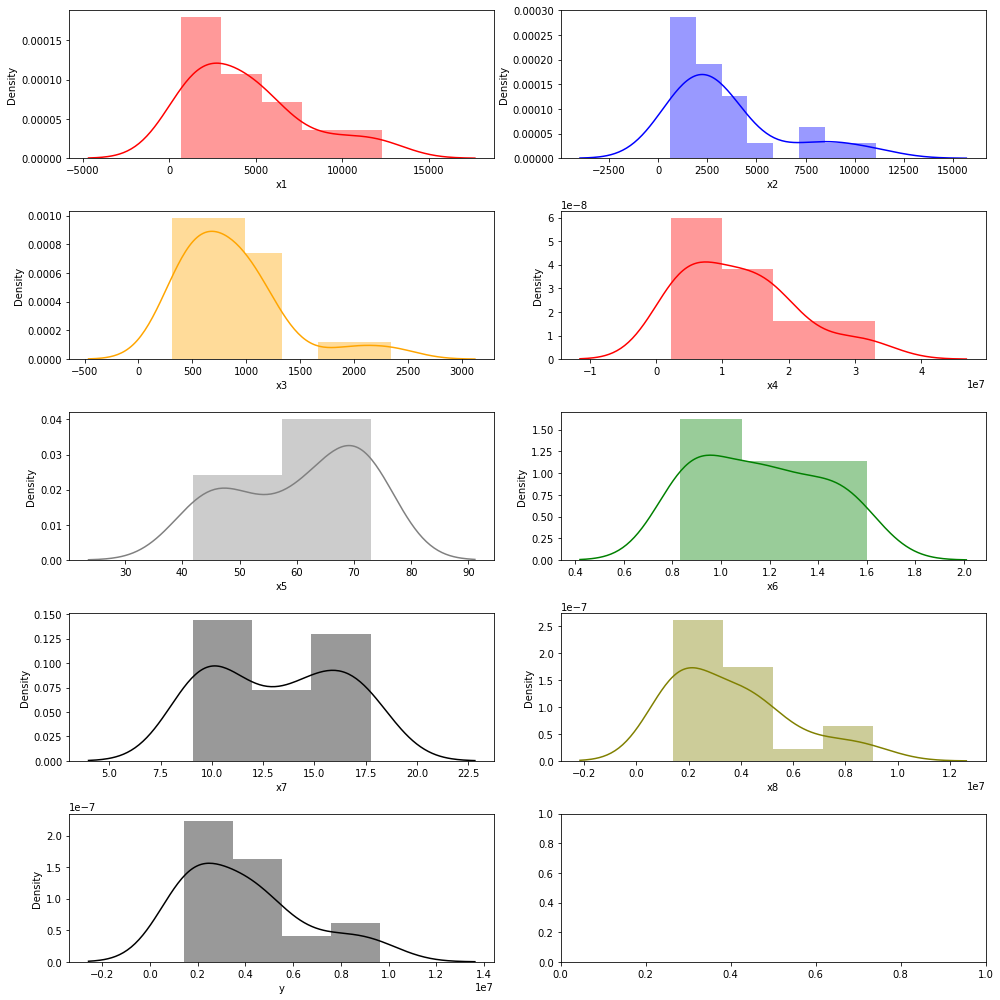

In [8]:
fig,axes = plt.subplots(5,2,figsize = (14,14))
sns.distplot(df['x1'], color = 'red', ax = axes[0,0])
sns.distplot(df['x2'], color = 'blue', ax = axes[0,1])
sns.distplot(df['x3'], color = 'orange', ax = axes[1,0])
sns.distplot(df['x4'], color = 'r', ax = axes[1,1])
sns.distplot(df['x5'], color = 'grey', ax = axes[2,0])
sns.distplot(df['x6'], color = 'green', ax = axes[2,1])
sns.distplot(df['x7'], color = 'black', ax = axes[3,0])
sns.distplot(df['x8'], color = 'olive', ax = axes[3,1])
sns.distplot(df['y'], color = 'black', ax = axes[4,0])
plt.tight_layout()

In [9]:
df.corr() #cheching the corelation among variables

year         y        x1        x2        x3        x4        x5  \
year  1.000000  0.944833  0.939130  0.882295  0.825611  0.961171  0.969569   
y     0.944833  1.000000  0.996550  0.978326  0.918962  0.988878  0.853840   
x1    0.939130  0.996550  1.000000  0.984422  0.928682  0.988735  0.839125   
x2    0.882295  0.978326  0.984422  1.000000  0.934583  0.955211  0.757829   
x3    0.825611  0.918962  0.928682  0.934583  1.000000  0.920414  0.716998   
x4    0.961171  0.988878  0.988735  0.955211  0.920414  1.000000  0.883126   
x5    0.969569  0.853840  0.839125  0.757829  0.716998  0.883126  1.000000   
x6   -0.964394 -0.878026 -0.864609 -0.799497 -0.717146 -0.898978 -0.972480   
x7    0.971455  0.921967  0.901486  0.835706  0.767403  0.922146  0.961326   
x8    0.940027  0.996339  0.994602  0.971412  0.925323  0.991665  0.848169   

            x6        x7        x8  
year -0.964394  0.971455  0.940027  
y    -0.878026  0.921967  0.996339  
x1   -0.864609  0.901486  0.994602  
x2   -0.799497  0.835706  0.971412  
x3   -0.717146  0.767403  0.925323  
x4   -0.898978  0.922146  0.991665  
x5   -0.972480  0.961326  0.848169  
x6    1.000000 -0.942198 -0.868957  
x7   -0.942198  1.000000  0.916963  
x8   -0.868957  0.916963  1.000000

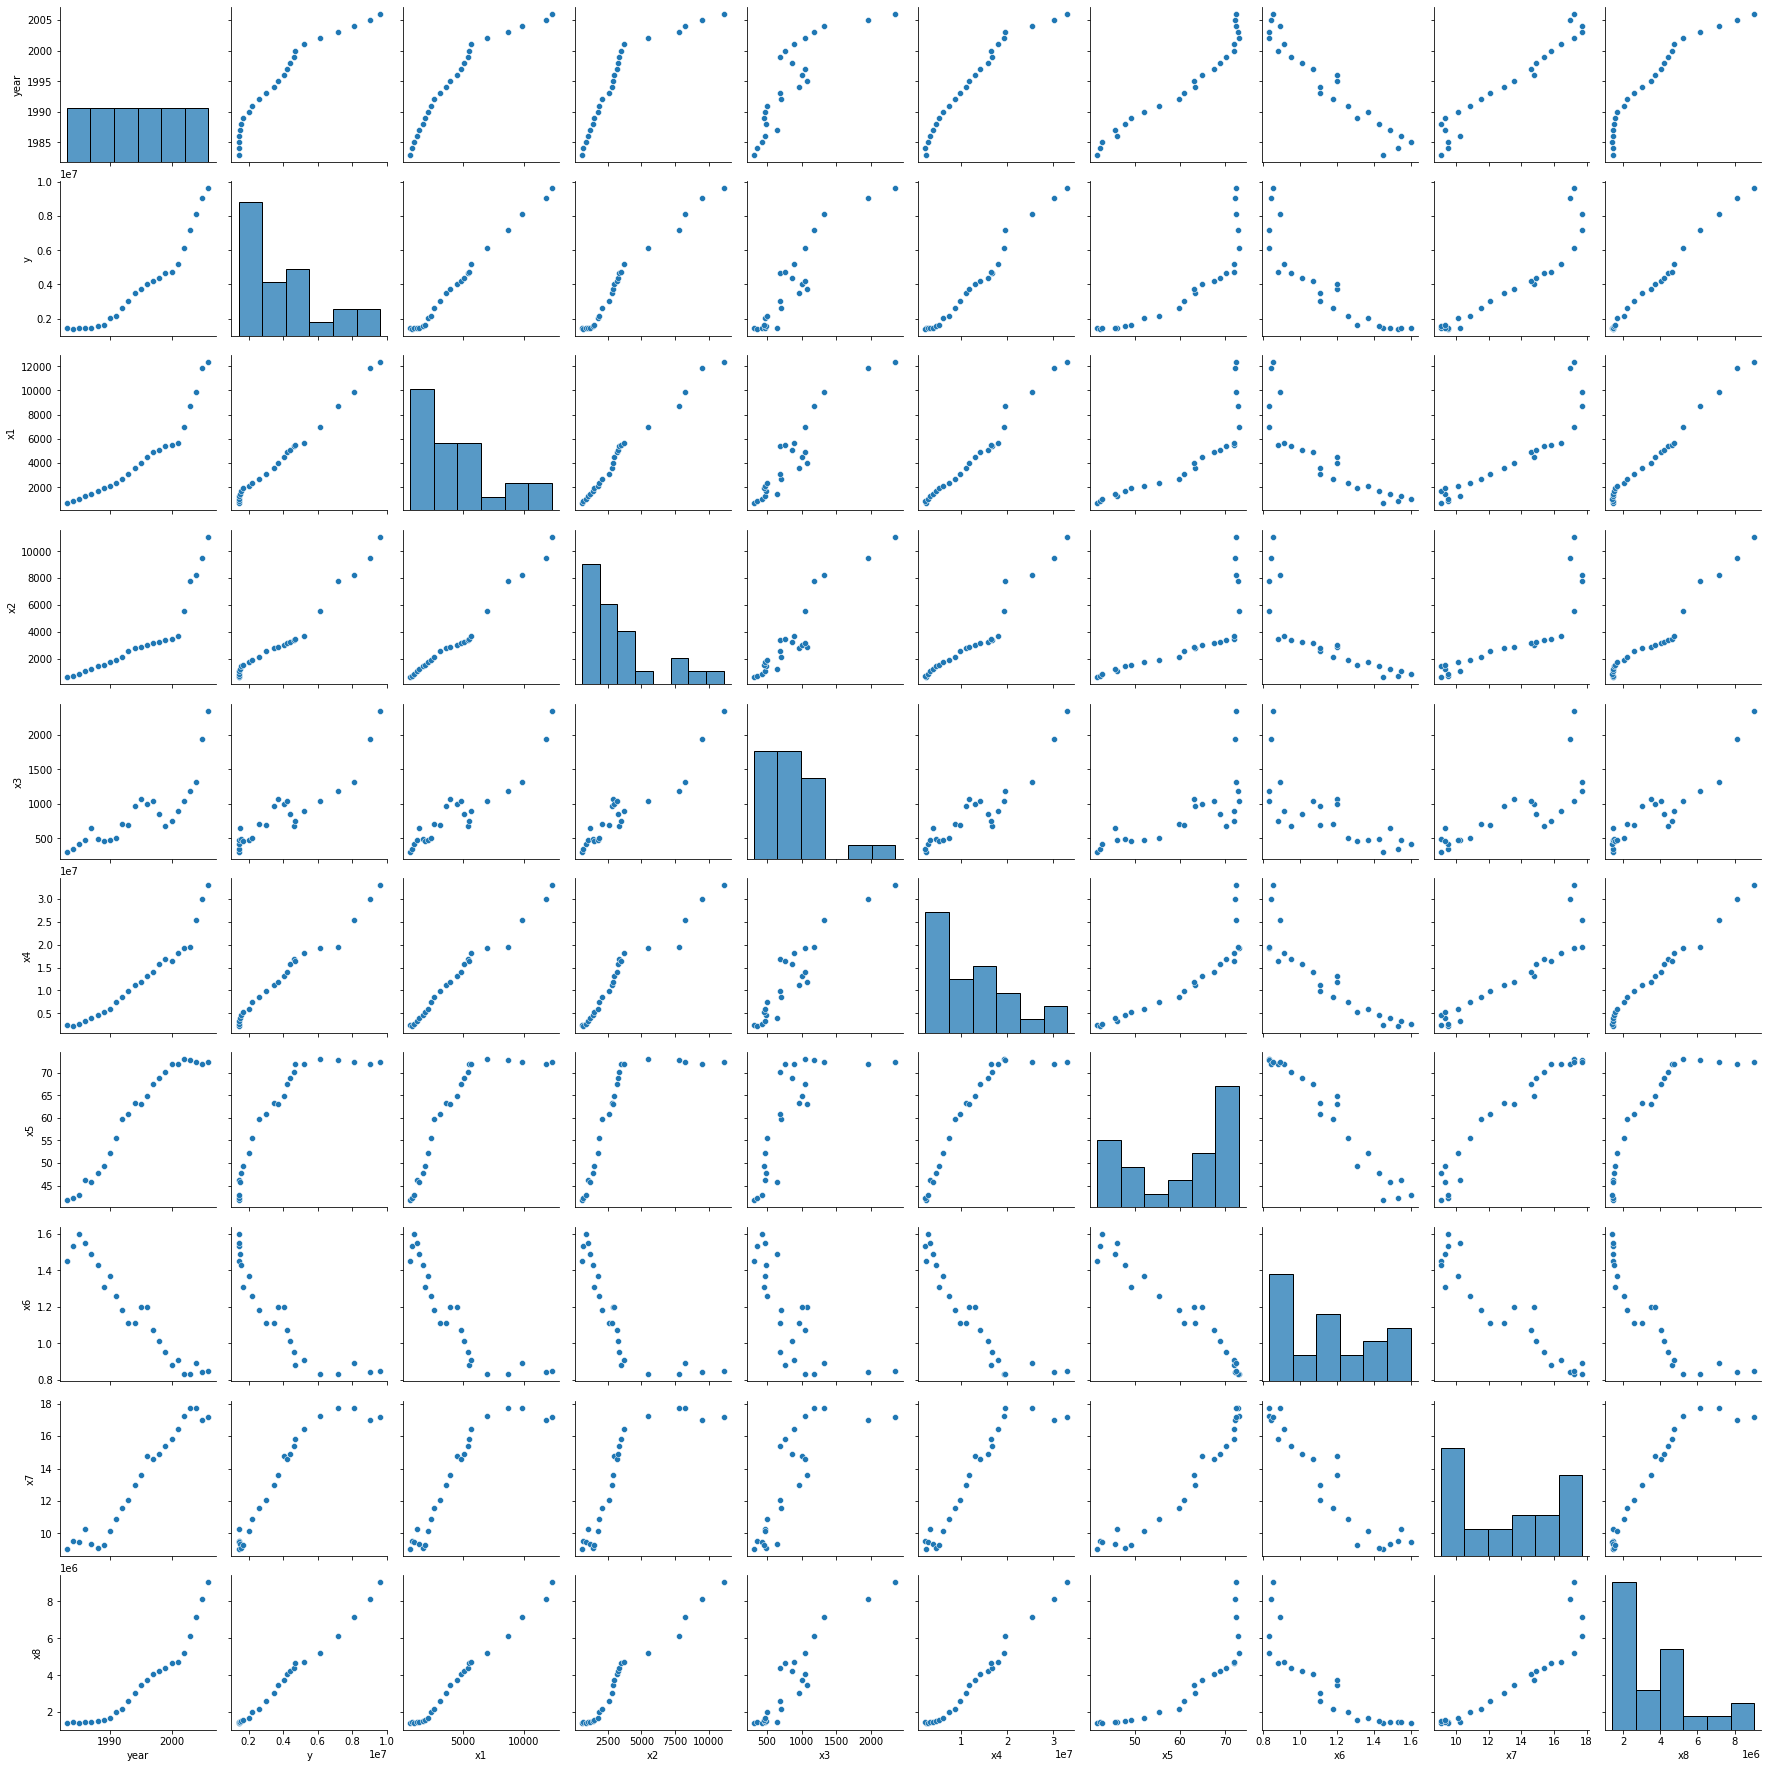

In [10]:
sns.pairplot(df) # drawing a pair plot to look at the trends

In [11]:
df = df.set_index('year') #converting year to index as it is easy to normalize and it is not need to fit th elinear regression
df

y     x1     x2    x3        x4     x5    x6     x7       x8
year                                                                    
1983  1442800    689    612   311   2375900  41.80  1.45   9.07  1421900
1984  1417200    855    720   351   2305000  42.33  1.53   9.54  1442800
1985  1466100   1028    874   426   2765900  42.93  1.60   9.49  1417200
1986  1454500   1268   1087   472   3306400  46.21  1.55  10.25  1466100
1987  1489400   1446   1197   652   3981400  45.80  1.49   9.35  1454500
1988  1559200   1705   1417   486   4551000  47.80  1.43   9.08  1489400
1989  1652300   1892   1524   458   5269100  49.30  1.31   9.31  1559200
1990  2024600   2113   1761   473   6020400  52.15  1.37  10.13  1652300
1991  2175900   2372   1903   506   7406200  55.46  1.26  10.88  2024600
1992  2606400   2640   2123   705   8676500  59.83  1.18  11.54  2175900
1993  3025300   3090   2574   689   9879800  60.87  1.11  12.07  2606400
1994  3493100   3603   2826   964  11108700  63.39  1.11  12.96  3025300
1995  3725800   3987   2878  1073  11832700  63.12  1.20  13.57  3493100
1996  4037600   4530   3002  1003  13091800  64.79  1.20  14.76  3725800
1997  4200500   4872   3172  1044  14063100  67.45  1.07  14.59  4037600
1998  4398200   5110   3260   854  15760600  68.89  1.01  14.88  4200500
1999  4649700   5400   3375   686  16760300  70.12  0.95  15.40  4398200
2000  4712500   5524   3497   758  16519000  71.88  0.88  15.82  4649700
2001  5205000   5653   3704   891  18083400  71.88  0.91  16.46  4712500
2002  6115500   6958   5523  1043  19267300  72.95  0.83  17.22  5205000
2003  7158700   8680   7805  1181  19580500  72.83  0.83  17.74  6115500
2004  8109500   9864   8263  1319  25365000  72.28  0.89  17.71  7158700
2005  9051000  11805   9522  1946  30032000  72.01  0.84  16.98  8109500
2006  9623000  12314  11092  2347  32987000  72.31  0.85  17.20  9051000

In [12]:
#Normalizing the data using MinMaxScaler

from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()

names = df.columns
d = scaler.fit_transform(df)
scaled_df = pd.DataFrame(d, columns=names)
scaled_df


y        x1        x2        x3        x4        x5        x6  \
0   0.003120  0.000000  0.000000  0.000000  0.002311  0.000000  0.805195   
1   0.000000  0.014280  0.010305  0.019646  0.000000  0.017014  0.909091   
2   0.005959  0.029161  0.025000  0.056483  0.015022  0.036276  1.000000   
3   0.004546  0.049806  0.045324  0.079077  0.032638  0.141573  0.935065   
4   0.008799  0.065118  0.055821  0.167485  0.054638  0.128411  0.857143   
5   0.017305  0.087398  0.076813  0.085953  0.073203  0.192616  0.779221   
6   0.028650  0.103484  0.087023  0.072200  0.096607  0.240770  0.623377   
7   0.074021  0.122495  0.109637  0.079568  0.121094  0.332263  0.701299   
8   0.092459  0.144774  0.123187  0.095776  0.166260  0.438523  0.558442   
9   0.144922  0.167828  0.144179  0.193517  0.207662  0.578812  0.454545   
10  0.195971  0.206538  0.187214  0.185658  0.246881  0.612199  0.363636   
11  0.252980  0.250667  0.211260  0.320727  0.286934  0.693098  0.363636   
12  0.281338  0.283699  0.216221  0.374263  0.310531  0.684430  0.480519   
13  0.319335  0.330409  0.228053  0.339882  0.351568  0.738042  0.480519   
14  0.339187  0.359828  0.244275  0.360020  0.383225  0.823435  0.311688   
15  0.363280  0.380301  0.252672  0.266699  0.438550  0.869663  0.233766   
16  0.393929  0.405247  0.263645  0.184185  0.471133  0.909149  0.155844   
17  0.401582  0.415914  0.275286  0.219548  0.463268  0.965650  0.064935   
18  0.461600  0.427011  0.295038  0.284872  0.514256  0.965650  0.103896   
19  0.572558  0.539269  0.468607  0.359528  0.552842  1.000000  0.000000   
20  0.699688  0.687398  0.686355  0.427308  0.563050  0.996148  0.000000   
21  0.815557  0.789247  0.730057  0.495088  0.751581  0.978491  0.077922   
22  0.930293  0.956215  0.850191  0.803045  0.903689  0.969823  0.012987   
23  1.000000  1.000000  1.000000  1.000000  1.000000  0.979454  0.025974   

          x7        x8  
0   0.000000  0.000616  
1   0.054210  0.003354  
2   0.048443  0.000000  
3   0.136101  0.006406  
4   0.032295  0.004886  
5   0.001153  0.009458  
6   0.027682  0.018601  
7   0.122261  0.030797  
8   0.208766  0.079567  
9   0.284890  0.099387  
10  0.346021  0.155781  
11  0.448674  0.210655  
12  0.519031  0.271935  
13  0.656286  0.302418  
14  0.636678  0.343263  
15  0.670127  0.364602  
16  0.730104  0.390500  
17  0.778547  0.423446  
18  0.852364  0.431672  
19  0.940023  0.496188  
20  1.000000  0.615460  
21  0.996540  0.752116  
22  0.912341  0.876667  
23  0.937716  1.000000

It can be seen the data is scaled

In [13]:
# Rows from year 1983-1999 are stored in train data frame 
train_df = scaled_df.head(n=17)
train_df

y        x1        x2        x3        x4        x5        x6  \
0   0.003120  0.000000  0.000000  0.000000  0.002311  0.000000  0.805195   
1   0.000000  0.014280  0.010305  0.019646  0.000000  0.017014  0.909091   
2   0.005959  0.029161  0.025000  0.056483  0.015022  0.036276  1.000000   
3   0.004546  0.049806  0.045324  0.079077  0.032638  0.141573  0.935065   
4   0.008799  0.065118  0.055821  0.167485  0.054638  0.128411  0.857143   
5   0.017305  0.087398  0.076813  0.085953  0.073203  0.192616  0.779221   
6   0.028650  0.103484  0.087023  0.072200  0.096607  0.240770  0.623377   
7   0.074021  0.122495  0.109637  0.079568  0.121094  0.332263  0.701299   
8   0.092459  0.144774  0.123187  0.095776  0.166260  0.438523  0.558442   
9   0.144922  0.167828  0.144179  0.193517  0.207662  0.578812  0.454545   
10  0.195971  0.206538  0.187214  0.185658  0.246881  0.612199  0.363636   
11  0.252980  0.250667  0.211260  0.320727  0.286934  0.693098  0.363636   
12  0.281338  0.283699  0.216221  0.374263  0.310531  0.684430  0.480519   
13  0.319335  0.330409  0.228053  0.339882  0.351568  0.738042  0.480519   
14  0.339187  0.359828  0.244275  0.360020  0.383225  0.823435  0.311688   
15  0.363280  0.380301  0.252672  0.266699  0.438550  0.869663  0.233766   
16  0.393929  0.405247  0.263645  0.184185  0.471133  0.909149  0.155844   

          x7        x8  
0   0.000000  0.000616  
1   0.054210  0.003354  
2   0.048443  0.000000  
3   0.136101  0.006406  
4   0.032295  0.004886  
5   0.001153  0.009458  
6   0.027682  0.018601  
7   0.122261  0.030797  
8   0.208766  0.079567  
9   0.284890  0.099387  
10  0.346021  0.155781  
11  0.448674  0.210655  
12  0.519031  0.271935  
13  0.656286  0.302418  
14  0.636678  0.343263  
15  0.670127  0.364602  
16  0.730104  0.390500

In [14]:
# seperating the target variable from the rest of data set
x_train = train_df[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']] 
y_train = train_df['y']

In [15]:
x_train

x1        x2        x3        x4        x5        x6        x7  \
0   0.000000  0.000000  0.000000  0.002311  0.000000  0.805195  0.000000   
1   0.014280  0.010305  0.019646  0.000000  0.017014  0.909091  0.054210   
2   0.029161  0.025000  0.056483  0.015022  0.036276  1.000000  0.048443   
3   0.049806  0.045324  0.079077  0.032638  0.141573  0.935065  0.136101   
4   0.065118  0.055821  0.167485  0.054638  0.128411  0.857143  0.032295   
5   0.087398  0.076813  0.085953  0.073203  0.192616  0.779221  0.001153   
6   0.103484  0.087023  0.072200  0.096607  0.240770  0.623377  0.027682   
7   0.122495  0.109637  0.079568  0.121094  0.332263  0.701299  0.122261   
8   0.144774  0.123187  0.095776  0.166260  0.438523  0.558442  0.208766   
9   0.167828  0.144179  0.193517  0.207662  0.578812  0.454545  0.284890   
10  0.206538  0.187214  0.185658  0.246881  0.612199  0.363636  0.346021   
11  0.250667  0.211260  0.320727  0.286934  0.693098  0.363636  0.448674   
12  0.283699  0.216221  0.374263  0.310531  0.684430  0.480519  0.519031   
13  0.330409  0.228053  0.339882  0.351568  0.738042  0.480519  0.656286   
14  0.359828  0.244275  0.360020  0.383225  0.823435  0.311688  0.636678   
15  0.380301  0.252672  0.266699  0.438550  0.869663  0.233766  0.670127   
16  0.405247  0.263645  0.184185  0.471133  0.909149  0.155844  0.730104   

          x8  
0   0.000616  
1   0.003354  
2   0.000000  
3   0.006406  
4   0.004886  
5   0.009458  
6   0.018601  
7   0.030797  
8   0.079567  
9   0.099387  
10  0.155781  
11  0.210655  
12  0.271935  
13  0.302418  
14  0.343263  
15  0.364602  
16  0.390500

In [16]:
y_train

0     0.003120
1     0.000000
2     0.005959
3     0.004546
4     0.008799
5     0.017305
6     0.028650
7     0.074021
8     0.092459
9     0.144922
10    0.195971
11    0.252980
12    0.281338
13    0.319335
14    0.339187
15    0.363280
16    0.393929
Name: y, dtype: float64

In [17]:
from sklearn.linear_model import LinearRegression

#Create a linear regression model lr
lr = LinearRegression()

#fit and train the lr model
lr.fit(x_train,y_train)

#finding the intercept
print("linear regression intercept:",lr.intercept_)

linear regression intercept: 0.017902298215817736


In [18]:
#selecting the rows from 2000-2006 for testing linear regression algo
test_df = scaled_df.tail(7)

In [19]:
test_df

y        x1        x2        x3        x4        x5        x6  \
17  0.401582  0.415914  0.275286  0.219548  0.463268  0.965650  0.064935   
18  0.461600  0.427011  0.295038  0.284872  0.514256  0.965650  0.103896   
19  0.572558  0.539269  0.468607  0.359528  0.552842  1.000000  0.000000   
20  0.699688  0.687398  0.686355  0.427308  0.563050  0.996148  0.000000   
21  0.815557  0.789247  0.730057  0.495088  0.751581  0.978491  0.077922   
22  0.930293  0.956215  0.850191  0.803045  0.903689  0.969823  0.012987   
23  1.000000  1.000000  1.000000  1.000000  1.000000  0.979454  0.025974   

          x7        x8  
17  0.778547  0.423446  
18  0.852364  0.431672  
19  0.940023  0.496188  
20  1.000000  0.615460  
21  0.996540  0.752116  
22  0.912341  0.876667  
23  0.937716  1.000000

In [20]:
# making x_test data set for prediction
x_test = test_df[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8']] 

In [21]:
#making y test dataset for metrics
y_test = test_df['y']

In [22]:
# predicting the target values using trained algorithm of 8 variables
y_pred = lr.predict(x_test)

In [23]:
#y_train_pred = lr.predict(x_train)

In [24]:
from sklearn import metrics

#Calculate  RMSE 

#print("RMSE for Training Data predictions: ", np.sqrt(metrics.mean_squared_error(y_train,y_train_pred)))

RMSE_8V = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
print("RMSE for Testing Data predictions for 8 variable model: ",RMSE_8V  )

RMSE for Testing Data predictions for 8 variable model:  0.05798149405100128


p-value:  1.6117965197333718e-05
Correlation:  0.9906585717960394


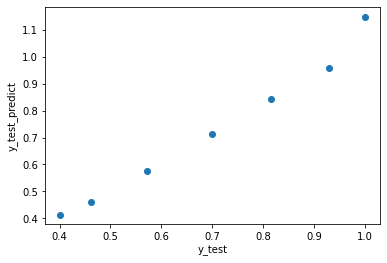

In [25]:
#visualisation of corelation to proove the model performance

from scipy.stats import pearsonr
stat, pvalue= pearsonr(y_test,y_pred)
print ("p-value: ", pvalue)
print ("Correlation: ", stat)
plt.scatter(x=y_test,y=y_pred)
plt.xlabel('y_test')
plt.ylabel('y_test_predict')

plt.show()

The corelation is extremely high So, we can say the model is better

In [26]:
# comparing actual and predicted solutions
comparision = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred}, columns=['y_test', 'y_pred'])
comparision

y_test    y_pred
17  0.401582  0.414611
18  0.461600  0.459540
19  0.572558  0.575972
20  0.699688  0.714261
21  0.815557  0.841735
22  0.930293  0.957259
23  1.000000  1.147386

In [27]:
# taking only 4 variables  for the training

x_train2 = train_df[[ 'x2', 'x4', 'x5', 'x7']] 
y_train2 = train_df['y']

In [28]:
#Create a linear regression model lr2
lr2 = LinearRegression()

#fit and train the lr model
lr2.fit(x_train2,y_train2)

#finding the intercept
print("linear regression intercept:",lr2.intercept_)

linear regression intercept: -0.02301497896490079


In [29]:
# test data set using only 4 variables
x_test2 = test_df[['x2', 'x4', 'x5', 'x7']] 

In [30]:
y_test2 = test_df['y']

In [31]:
# predicting the target using the trained 4 variable algorithm
y_pred2 = lr2.predict(x_test2)

In [32]:
# measuring rootmean square error for 4 variable model

RMSE_4V = np.sqrt(metrics.mean_squared_error(y_test2,y_pred2))
print("RMSE for Testing Data predictions for 4 variable model : ",RMSE_4V )

RMSE for Testing Data predictions for 4 variable model :  0.029473741059540093


RMSE of 4 variable model is better than 8 variable model.

Importing the production data

In [33]:
df_new = pd.read_csv('Data_From_China_Oilfield_2.csv')

Exploratory data analysis

In [34]:
df_new

year     ynew  x2new     x4new  x5new  x7new
0   1983  1352300    407   1564500  40.96   8.92
1   1984  1326700    515   1493600  41.49   9.39
2   1985  1375600    669   1954500  42.09   9.34
3   1986  1364000    882   2495000  45.37  10.10
4   1987  1398900    992   3170000  44.96   9.20
5   1988  1468700   1212   3739600  46.96   8.93
6   1989  1561800   1319   4457700  48.46   9.16
7   1990  1934100   1556   5209000  51.31   9.98
8   1991  2085400   1698   6594800  54.62  10.73
9   1992  2515900   1918   7865100  58.99  11.39
10  1993  2934800   2396   9068400  60.03  11.92
11  1994  3402600   2621  10297300  62.55  12.81
12  1995  3653000   2673  11021300  62.28  13.42
13  1996  3947100   2797  12280400  63.95  14.61
14  1997  4110000   2967  13251700  66.61  14.44
15  1998  4307700   3055  14949200  68.05  14.73
16  1999  4559200   3170  15948900  69.28  15.25
17  2000  4622000   3292  15707600  71.04  15.67
18  2001  5114500   3499  17272000  71.04  16.31
19  2002  6025000   5318  18455900  72.11  17.07
20  2003  7068200   7600  18769100  71.99  17.59
21  2004  8019000   8058  24553600  71.44  17.56
22  2005  8960500   9317  29220600  71.17  16.83
23  2006  9532500  10887  32175600  71.47  16.61

In [35]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    24 non-null     int64  
 1   ynew    24 non-null     int64  
 2   x2new   24 non-null     int64  
 3   x4new   24 non-null     int64  
 4   x5new   24 non-null     float64
 5   x7new   24 non-null     float64
dtypes: float64(2), int64(4)
memory usage: 1.2 KB


It can be observed that there are no null values and all the features are in numeric form

In [36]:
df_new.isna().sum()  #looking for null values

year     0
ynew     0
x2new    0
x4new    0
x5new    0
x7new    0
dtype: int64

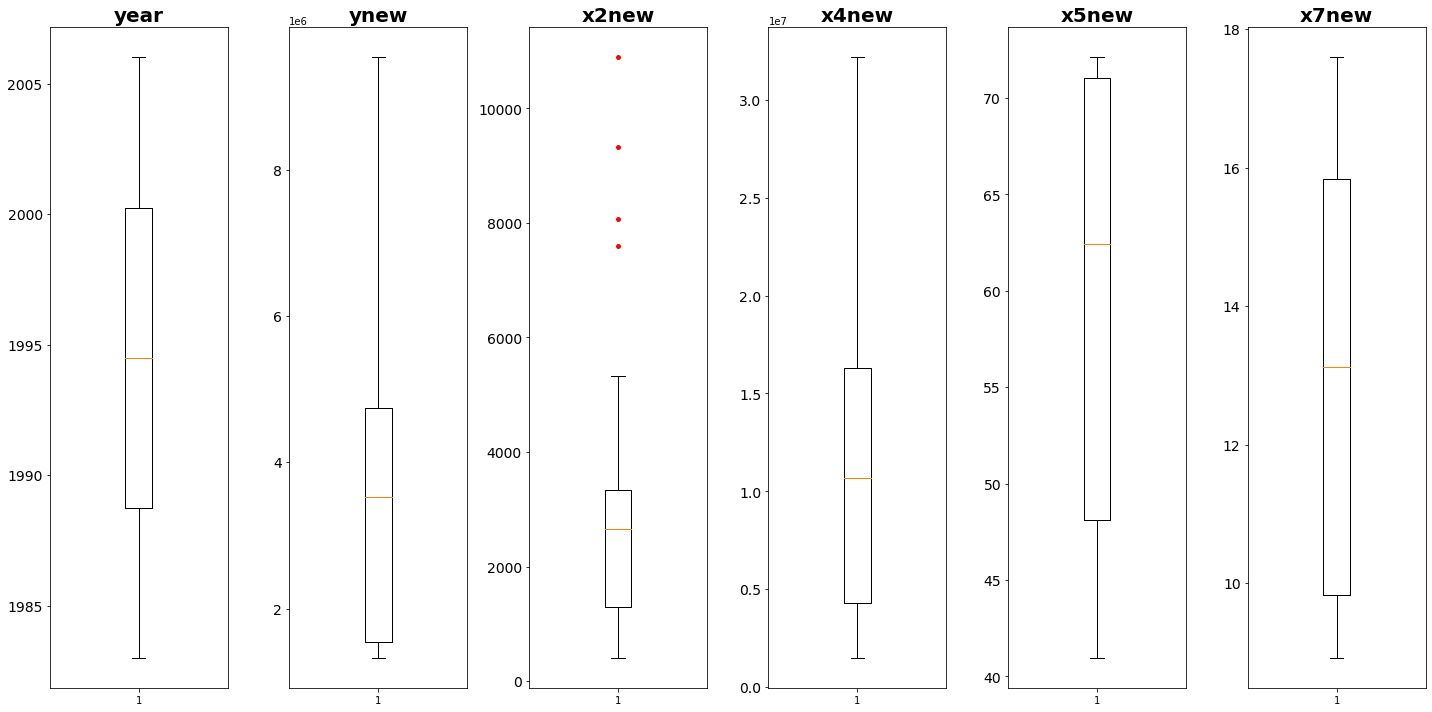

In [37]:
#Creating subplot of each column with its own scale
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fig, axs = plt.subplots(1, len(df_new.columns), figsize=(20,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df_new.iloc[:,i], flierprops=red_circle)
    ax.set_title(df_new.columns[i], fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
    
plt.tight_layout()

In [38]:
df_new.corr() #checking the corelation among variables

year      ynew     x2new     x4new     x5new     x7new
year   1.000000  0.944880  0.882321  0.961171  0.969569  0.968672
ynew   0.944880  1.000000  0.978262  0.988879  0.853937  0.915097
x2new  0.882321  0.978262  1.000000  0.955208  0.757944  0.825827
x4new  0.961171  0.988879  0.955208  1.000000  0.883126  0.914620
x5new  0.969569  0.853937  0.757944  0.883126  1.000000  0.961969
x7new  0.968672  0.915097  0.825827  0.914620  0.961969  1.000000

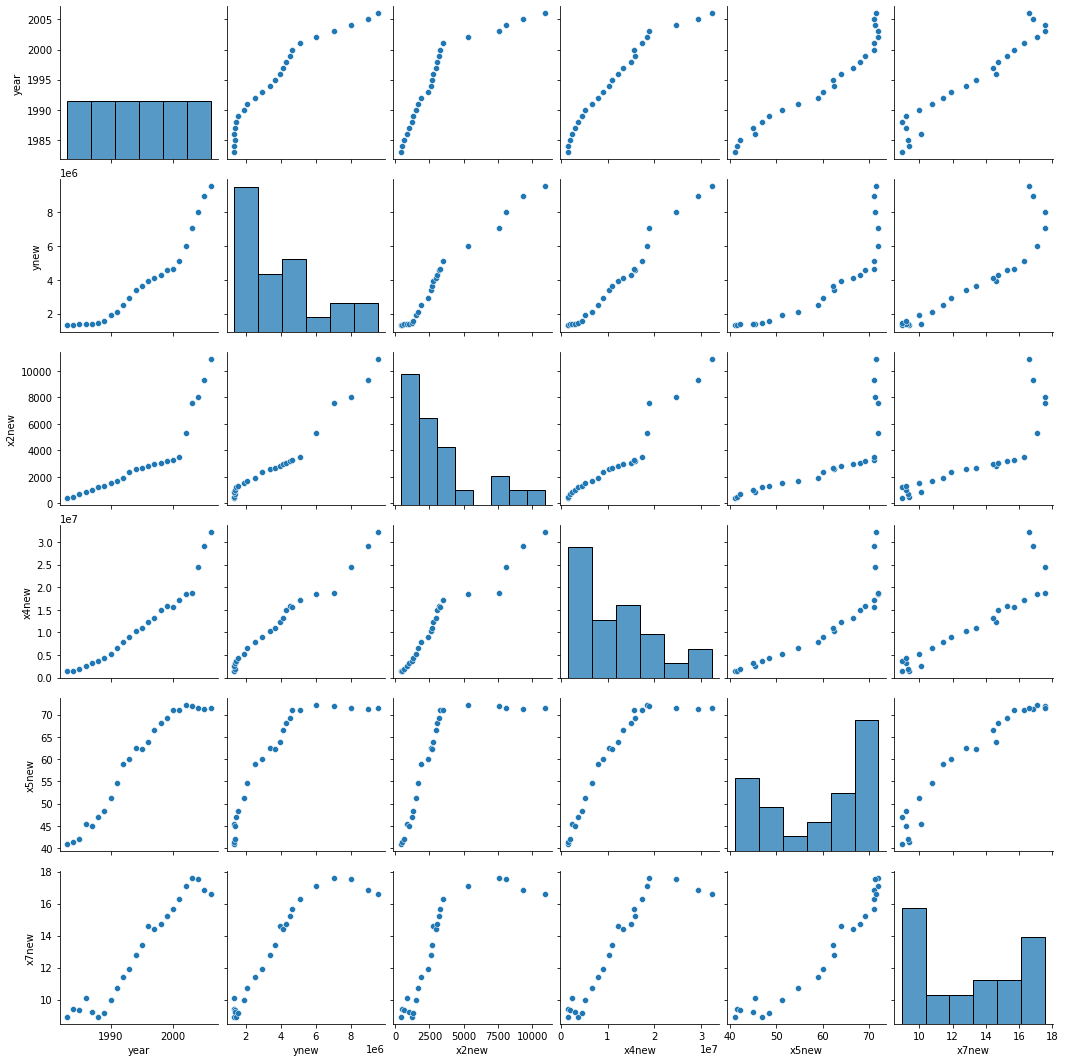

In [39]:
sns.pairplot(df_new)  # drawing a pair plot to look at the trends

In [40]:
#converting year to index as it is easy to normalize and it is not need to fit th elinear regression
df_new = df_new.set_index('year')
df_new

ynew  x2new     x4new  x5new  x7new
year                                        
1983  1352300    407   1564500  40.96   8.92
1984  1326700    515   1493600  41.49   9.39
1985  1375600    669   1954500  42.09   9.34
1986  1364000    882   2495000  45.37  10.10
1987  1398900    992   3170000  44.96   9.20
1988  1468700   1212   3739600  46.96   8.93
1989  1561800   1319   4457700  48.46   9.16
1990  1934100   1556   5209000  51.31   9.98
1991  2085400   1698   6594800  54.62  10.73
1992  2515900   1918   7865100  58.99  11.39
1993  2934800   2396   9068400  60.03  11.92
1994  3402600   2621  10297300  62.55  12.81
1995  3653000   2673  11021300  62.28  13.42
1996  3947100   2797  12280400  63.95  14.61
1997  4110000   2967  13251700  66.61  14.44
1998  4307700   3055  14949200  68.05  14.73
1999  4559200   3170  15948900  69.28  15.25
2000  4622000   3292  15707600  71.04  15.67
2001  5114500   3499  17272000  71.04  16.31
2002  6025000   5318  18455900  72.11  17.07
2003  7068200   7600  18769100  71.99  17.59
2004  8019000   8058  24553600  71.44  17.56
2005  8960500   9317  29220600  71.17  16.83
2006  9532500  10887  32175600  71.47  16.61

In [41]:
#Normalizing the data using MinMaxScaler

from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()

names = df_new.columns
d = scaler.fit_transform(df_new)
scaled_df_new = pd.DataFrame(d, columns=names)
scaled_df_new

ynew     x2new     x4new     x5new     x7new
0   0.003120  0.000000  0.002311  0.000000  0.000000
1   0.000000  0.010305  0.000000  0.017014  0.054210
2   0.005959  0.025000  0.015022  0.036276  0.048443
3   0.004546  0.045324  0.032638  0.141573  0.136101
4   0.008799  0.055821  0.054638  0.128411  0.032295
5   0.017305  0.076813  0.073203  0.192616  0.001153
6   0.028650  0.087023  0.096607  0.240770  0.027682
7   0.074021  0.109637  0.121094  0.332263  0.122261
8   0.092459  0.123187  0.166260  0.438523  0.208766
9   0.144922  0.144179  0.207662  0.578812  0.284890
10  0.195971  0.189790  0.246881  0.612199  0.346021
11  0.252980  0.211260  0.286934  0.693098  0.448674
12  0.283495  0.216221  0.310531  0.684430  0.519031
13  0.319335  0.228053  0.351568  0.738042  0.656286
14  0.339187  0.244275  0.383225  0.823435  0.636678
15  0.363280  0.252672  0.438550  0.869663  0.670127
16  0.393929  0.263645  0.471133  0.909149  0.730104
17  0.401582  0.275286  0.463268  0.965650  0.778547
18  0.461600  0.295038  0.514256  0.965650  0.852364
19  0.572558  0.468607  0.552842  1.000000  0.940023
20  0.699688  0.686355  0.563050  0.996148  1.000000
21  0.815557  0.730057  0.751581  0.978491  0.996540
22  0.930293  0.850191  0.903689  0.969823  0.912341
23  1.000000  1.000000  1.000000  0.979454  0.886967

In [42]:
# Rows from year 1983-1999 are stored in train data frame
train_df_new = scaled_df_new.head(n=17)
train_df_new

ynew     x2new     x4new     x5new     x7new
0   0.003120  0.000000  0.002311  0.000000  0.000000
1   0.000000  0.010305  0.000000  0.017014  0.054210
2   0.005959  0.025000  0.015022  0.036276  0.048443
3   0.004546  0.045324  0.032638  0.141573  0.136101
4   0.008799  0.055821  0.054638  0.128411  0.032295
5   0.017305  0.076813  0.073203  0.192616  0.001153
6   0.028650  0.087023  0.096607  0.240770  0.027682
7   0.074021  0.109637  0.121094  0.332263  0.122261
8   0.092459  0.123187  0.166260  0.438523  0.208766
9   0.144922  0.144179  0.207662  0.578812  0.284890
10  0.195971  0.189790  0.246881  0.612199  0.346021
11  0.252980  0.211260  0.286934  0.693098  0.448674
12  0.283495  0.216221  0.310531  0.684430  0.519031
13  0.319335  0.228053  0.351568  0.738042  0.656286
14  0.339187  0.244275  0.383225  0.823435  0.636678
15  0.363280  0.252672  0.438550  0.869663  0.670127
16  0.393929  0.263645  0.471133  0.909149  0.730104

In [43]:
# Rows from year 1983-1999 are stored in train data frame
x_train_new = train_df_new[[ 'x2new', 'x4new', 'x5new', 'x7new']] 
y_train_new = train_df_new['ynew']

In [44]:
x_train_new

x2new     x4new     x5new     x7new
0   0.000000  0.002311  0.000000  0.000000
1   0.010305  0.000000  0.017014  0.054210
2   0.025000  0.015022  0.036276  0.048443
3   0.045324  0.032638  0.141573  0.136101
4   0.055821  0.054638  0.128411  0.032295
5   0.076813  0.073203  0.192616  0.001153
6   0.087023  0.096607  0.240770  0.027682
7   0.109637  0.121094  0.332263  0.122261
8   0.123187  0.166260  0.438523  0.208766
9   0.144179  0.207662  0.578812  0.284890
10  0.189790  0.246881  0.612199  0.346021
11  0.211260  0.286934  0.693098  0.448674
12  0.216221  0.310531  0.684430  0.519031
13  0.228053  0.351568  0.738042  0.656286
14  0.244275  0.383225  0.823435  0.636678
15  0.252672  0.438550  0.869663  0.670127
16  0.263645  0.471133  0.909149  0.730104

In [45]:
y_train_new

0     0.003120
1     0.000000
2     0.005959
3     0.004546
4     0.008799
5     0.017305
6     0.028650
7     0.074021
8     0.092459
9     0.144922
10    0.195971
11    0.252980
12    0.283495
13    0.319335
14    0.339187
15    0.363280
16    0.393929
Name: ynew, dtype: float64

In [46]:
#Create a linear regression model lr
lr3 = LinearRegression()

#fit and train the lr model
lr3.fit(x_train_new,y_train_new)

#finding the intercept
print("linear regression intercept:",lr3.intercept_)

linear regression intercept: -0.023243733427325608


In [47]:
#selecting the rows from 2000-2006 for testing linear regression algorithm
test_df_new = scaled_df_new.tail(7)

In [48]:
# making x_test data set for prediction
x_test_new = test_df_new[['x2new', 'x4new', 'x5new', 'x7new']] 

In [49]:
#making y test dataset for metrics
y_test_new = test_df_new['ynew']

In [50]:
# predicting the target values using trained algorithm of new model
y_pred_new = lr3.predict(x_test_new)

In [51]:
#RMSE score for the new model
RMSE_NEW =np.sqrt(metrics.mean_squared_error(y_test_new,y_pred_new))
print("RMSE for Testing Data predictions new model: ", RMSE_NEW )

RMSE for Testing Data predictions new model:  0.02344711430296828


In [52]:
# predicting the target values using trained algorithm of 4variable model
y_pred_4v = lr2.predict(x_test_new)

In [53]:
#RMSE score for the new model
RMSE_NEW_4v =np.sqrt(metrics.mean_squared_error(y_test_new,y_pred_4v))
print("RMSE for Testing Data predictions of 4variable model on new data: ", RMSE_NEW )

RMSE for Testing Data predictions of 4variable model on new data:  0.02344711430296828


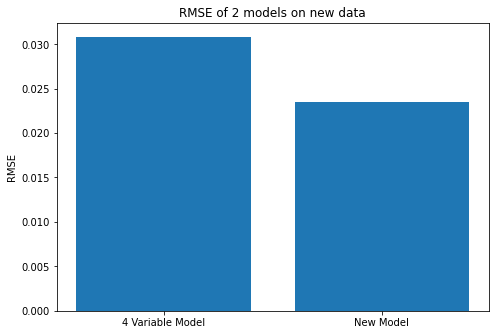

In [54]:
#plotting the RMSE scores of 4 variable model and new model on the new data
figl = plt.figure()
axl = figl.add_axes([0,0,1,1])
Model = [ '4 Variable Model', 'New Model']
RMSE = [RMSE_NEW_4v,RMSE_NEW]
axl.bar(Model,RMSE)
axl.set_ylabel('RMSE')
axl.set_title('RMSE of 2 models on new data')
plt.show()

It can be seen the RMSE is low on new model making it the better performing one